In [1]:
from PIL import Image

In [2]:
import numpy as np 

In [3]:
from keras.preprocessing import image

from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.layers import MaxPool2D, Flatten, AvgPool2D 

Using TensorFlow backend.


In [4]:
model = MobileNet(include_top=False, input_shape=(224, 224, 3))
x = AvgPool2D(pool_size=(7, 7))(model.layers[-1].output)
x = Flatten()(x)
model = Model(inputs=model.inputs, outputs=x) 

17227776/17225924 [==============================] - 13s 1us/step


In [5]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [6]:
q = Image.open('banana.jpg')
q = q.resize((224, 224))
q.save('banana_224x224.jpg') 

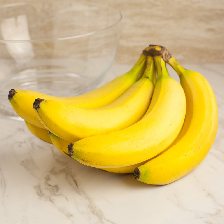

In [7]:
q

In [8]:
i = image.load_img('banana_224x224.jpg')  
i = np.expand_dims(image.img_to_array(i), axis=0)
i = preprocess_input(i)
prediction = model.predict(i)
prediction.shape 

(1, 1024)

In [9]:
import keras

In [10]:
keras.__version__

'2.1.3'

In [11]:
import coremltools

In [12]:
def convert_model(model, name='LibertyModel'):
    print('converting...')
    coreml_model = coremltools.converters.keras.convert(model, 
                                     input_names=['image'], 
                                     image_input_names='image', 
                                     image_scale=2/255.0,
                                     red_bias=-1,
                                     green_bias=-1,
                                     blue_bias=-1)
    coreml_model.author = 'TerryFoldFlaps'
    coreml_model.license = 'GNU GPLv3'
    coreml_model.short_description = 'Reads 224x224 image. Produces activation vector of length 1024.'
    coreml_model.input_description['image'] = 'A 224x224 pixel image'
    coreml_model.output_description['output1'] = 'Vector of size 1024'
    coreml_model.save(name + '.mlmodel')
    print('model converted') 

In [13]:
convert_model(model) 

converting...
0 : input_1, <keras.engine.topology.InputLayer object at 0x7f0e33967860>
1 : conv1, <keras.layers.convolutional.Conv2D object at 0x7f0e33967e10>
2 : conv1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f0e33967b70>
3 : conv1_relu, <keras.layers.core.Activation object at 0x7f0e33967da0>
4 : conv_dw_1, <keras.applications.mobilenet.DepthwiseConv2D object at 0x7f0ee8cd5208>
5 : conv_dw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f0e338fcb00>
6 : conv_dw_1_relu, <keras.layers.core.Activation object at 0x7f0e3383f8d0>
7 : conv_pw_1, <keras.layers.convolutional.Conv2D object at 0x7f0e33865d68>
8 : conv_pw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f0e33865588>
9 : conv_pw_1_relu, <keras.layers.core.Activation object at 0x7f0e3057cd68>
10 : conv_dw_2, <keras.applications.mobilenet.DepthwiseConv2D object at 0x7f0e304fc940>
11 : conv_dw_2_bn, <keras.layers.normalization.BatchNormalization object at 0x7f0e304ccfd0>
12 : 